<a href="https://colab.research.google.com/github/Luis-Yovera/Deteccion_infraccion_vehicular_de_estacionamiento_en_cruce_peatonal_durante_semaforo_en_rojo/blob/PRACTICAS/Copia_de_Practica_03_PDSeI__Convolucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg](https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg)

**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`

```
Práctica 4: implementación de la convolución
```

## **Practica 4: Implementación de la convolución discreta**

###**4.1. Importación de Librerías**

* **Librerias a utilizar:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import time
from IPython import display
plt.style.use(['dark_background']) # Para gráficas para temas oscuros.

###**4.2. Cálculo de la convolución usando una funcion de alto nivel**

![https://graphics.stanford.edu/courses/cs178/applets/convolution-equation2-c.jpg](https://graphics.stanford.edu/courses/cs178/applets/convolution-equation2-c.jpg)


![https://qph.fs.quoracdn.net/main-qimg-cb81d3dfbe146b84ebf717ec12722f32.webp](https://qph.fs.quoracdn.net/main-qimg-cb81d3dfbe146b84ebf717ec12722f32.webp)

* **Creación de la señal y el kernel**

In [ ]:
# Creando una señal arbitraria
senal1 = np.concatenate((np.zeros(30),np.ones(2),np.zeros(20),np.ones(30),2*np.ones(10),np.zeros(30),-np.ones(10),np.zeros(40),np.ones(50)))

#Creando el kernel
kernel = np.exp(-np.linspace(-2,2,20)**2) #Función Gaussiana
kernel = kernel/sum(kernel)
N = len(senal1) #Longitud de la señal

* **Mostrando señales creadas**

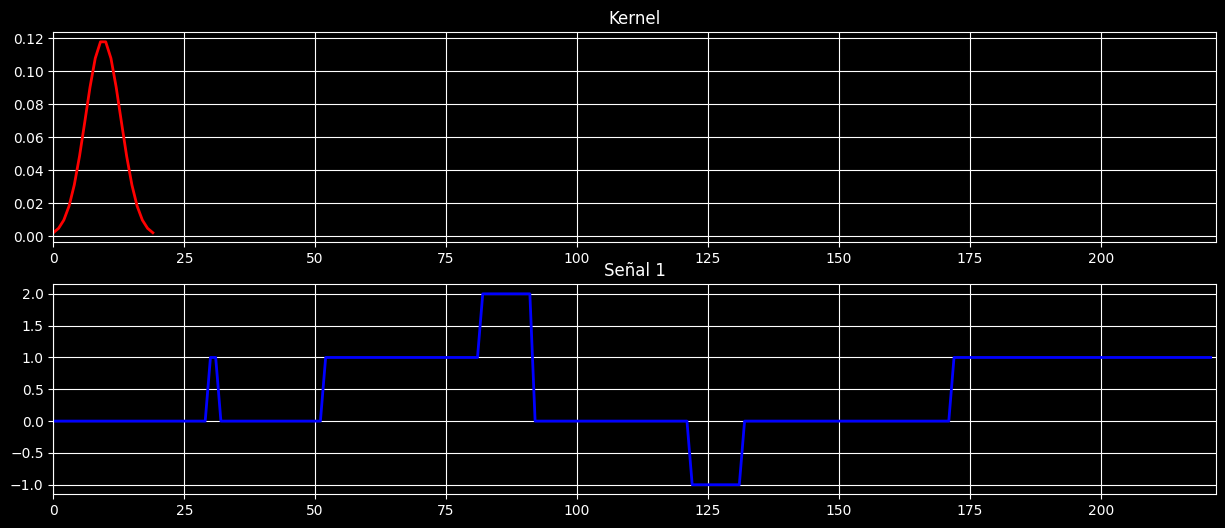

In [ ]:
plt.figure(figsize=(15,6)) #Estableciendo el tamaño de la gráfica

#Gráfica del kernel
plt.subplot(211)
plt.plot(kernel, 'r', linewidth=2)
plt.xlim([0,N]) #Limitamos el eje X entre 0 y N
plt.title('Kernel')
plt.grid()

#Gráfica de la señal
plt.subplot(212)
plt.plot(senal1, 'b', linewidth=2)
plt.xlim([0,N]) #Limitamos el eje X entre 0 y N
plt.title('Señal 1')
plt.grid()

plt.show()


 * **Cálculo y gráfica de la convolución**

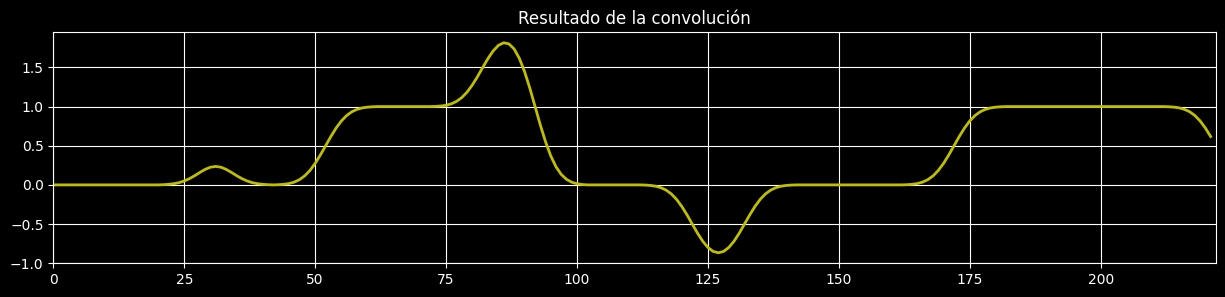

In [ ]:
resultado = np.convolve(senal1, kernel, 'same') #El 'same' indica que el resultado debe ser recortado y tener
                                                # las mismas dimensiones que la señal de entrada. Si se desea
                                                # el resultado completo se puede usar 'full' y no limitar el eje X

plt.figure(figsize=(15,3))

plt.plot(resultado, 'y', linewidth=2)
plt.xlim([0,N]) #Limitamos el eje X entre 0 y N
plt.title('Resultado de la convolución')
plt.grid()

plt.show()   # Se obtiene una señal suavizada


###**4.2. Detalles de la convolución**
>*Longitud de la convolución de 2 señales.*

>*Efecto del kernel*

* **Creación de señales y aplicación de la convolución**





In [ ]:
#Creando un pulso
senal1 = np.zeros(20)
senal1[8:15] = 1

#Kernel arbitrario
kernel = np.array([1, .8, .6, .4, .2])

#Tamaño de la convolución
nSenal1 = len(senal1)
nKernel = len(kernel)
nConvolucion = nSenal1 + nKernel -1

#Aplicación de la convolución
resultado = np.convolve(senal1, kernel, 'full')

* **Graficando resultados**

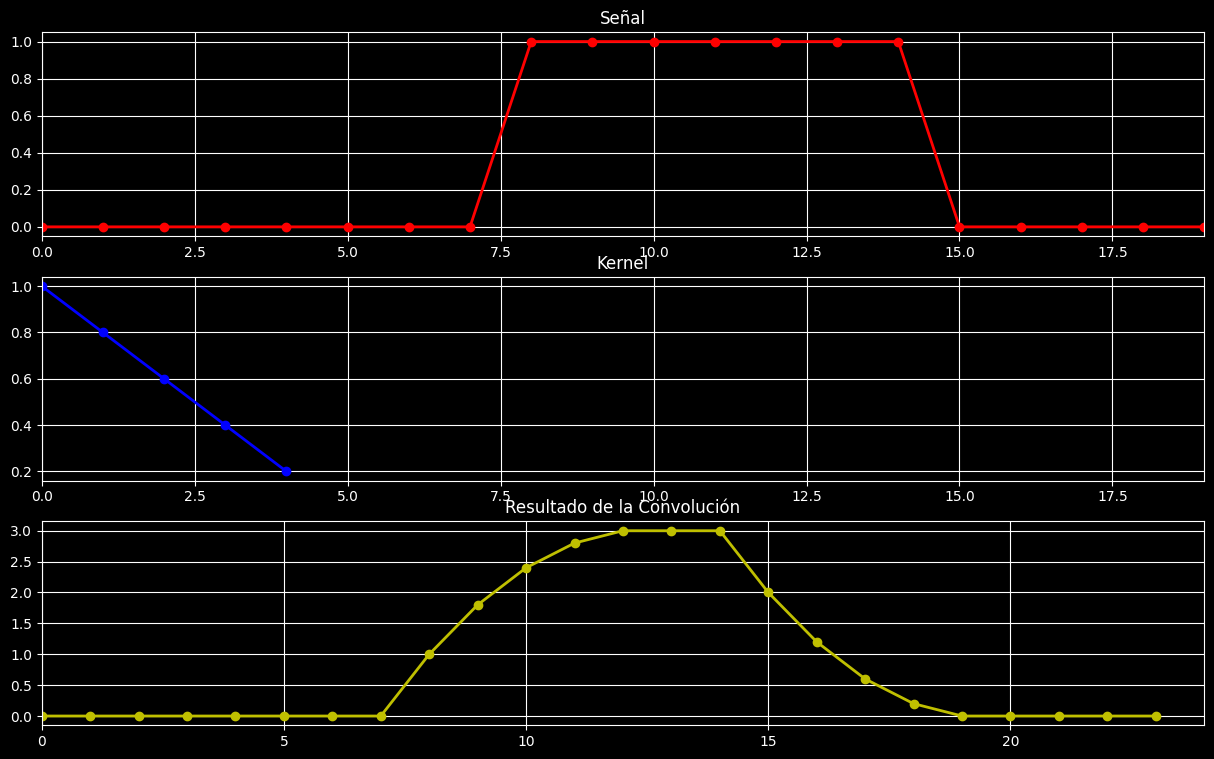

In [ ]:
plt.figure(figsize=(15,9))

#Gráfica de la señal 1
plt.subplot(311)
plt.plot(senal1, 'ro-', linewidth=2)
plt.xlim([0, nSenal1-1])
plt.title('Señal')
plt.grid()

#Gráfica del kernel
plt.subplot(312)
plt.plot(kernel, 'bo-', linewidth=2)
plt.xlim([0, nSenal1-1])
plt.title('Kernel')
plt.grid()

#Gráfica de los resultados
plt.subplot(313)
plt.plot(resultado, 'yo-', linewidth=2)
plt.xlim([0, nConvolucion])
plt.title('Resultado de la Convolución')
plt.grid()
plt.show()



###**4.3. Animación de la convolución**

*Se usarán las señales creadas en el apartado anterior*

In [ ]:
import warnings
warnings.filterwarnings('ignore')

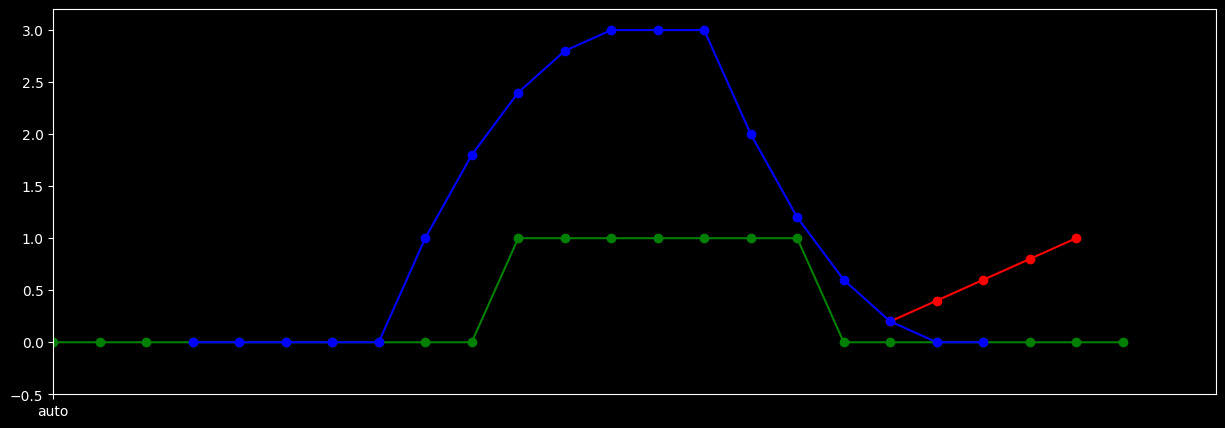

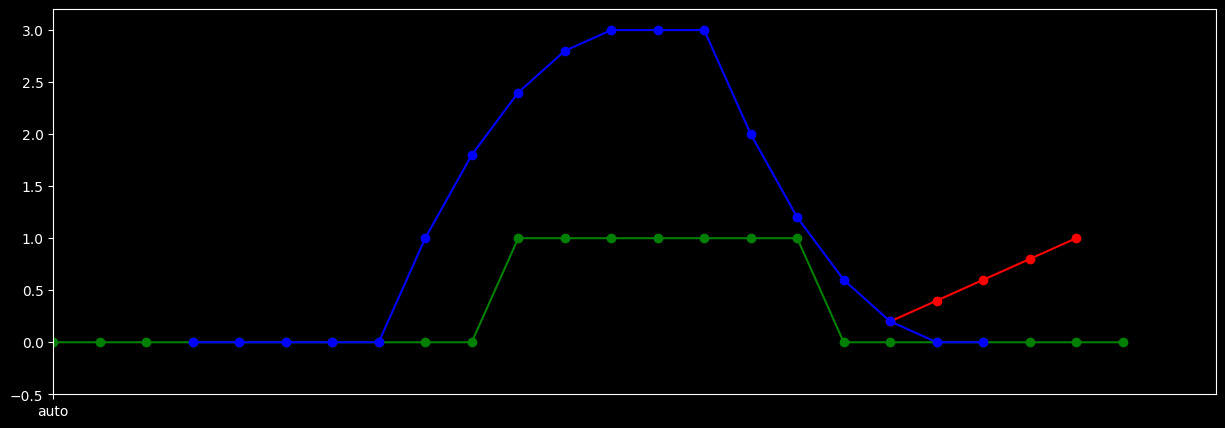

In [ ]:

# Calculamos la mitad del kernel
mitad_kernel = int(np.floor(nKernel / 2))  # redondeando la salida

# Invertimos el kernel
kernel_invertido = kernel[::-1]

# Rellenando la señal con 0's para almacenar la salida
senal1_pad = np.concatenate((np.zeros(mitad_kernel), senal1, np.zeros(mitad_kernel)), axis=0)

# Vector para almacenar el resultado

conv_resultado = np.zeros(nConvolucion)

# Correr la convolucion
plt.figure(figsize=(15, 5))

for ti in range(mitad_kernel, nConvolucion - mitad_kernel):

    # Extrayendo una ventana del tamaño del kernel
    ventana = senal1_pad[ti - mitad_kernel: ti + mitad_kernel + 1]

    # Producto punto de la ventana con el kernel invertido
    conv_resultado[ti] = np.sum(ventana * kernel_invertido)

    # Graficando
    plt.cla()  # Limpiar los ejes
    plt.axis(['auto', 'auto', -0.5, 3.2])
    plt.plot(senal1_pad, "go-")  # muestra la señal original
    plt.plot(np.arange(ti - mitad_kernel - 1, ti + mitad_kernel), kernel_invertido, "ro-")  # Muestra el movimiento del kernel
    plt.plot(np.arange(mitad_kernel + 1, ti), conv_resultado[mitad_kernel + 1:ti], "bo-")  # Muestra el resultado
    plt.xlim([0, nConvolucion + 1])  # Rango del eje x

    display.clear_output(wait=True)  # Limpia la salida de la celda
    display.display(plt.gcf())  # Selecciona la gráfica actual donde volverá a graficar

    time.sleep(0.5)

# Recortando los ejes
conv_resultado = conv_resultado[mitad_kernel:-mitad_kernel]
